In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/googleplaystore_user_reviews.csv


enter 1 for each app and 0 for everything0
The f1Score is =  0.8023275887790687 

The Confusion Matix is = 
 [[ 5836  2433     2]
 [    1  5149     8]
 [    3  3115 20880]] 

The accuracy is =  0.8513907072434339 



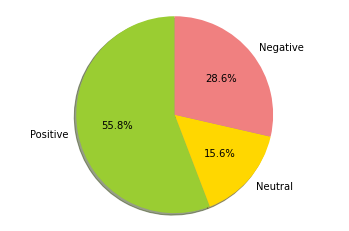

"\n# See http://www.datagenetics.com/blog/october52012/index.html\ntweet['clean'] = re.sub(r'\x08:\\)\x08', 'good', tweet['clean'])\ntweet['clean'] = re.sub(r'\x08:D\x08', 'good', tweet['clean'])\ntweet['clean'] = re.sub(r'\x08:\\(\x08', 'sad', tweet['clean'])\ntweet['clean'] = re.sub(r'\x08:-\\)\x08', 'good', tweet['clean'])\ntweet['clean'] = re.sub(r'\x08=\\)\x08', 'good', tweet['clean'])\ntweet['clean'] = re.sub(r'\x08\\(:\x08', 'good', tweet['clean'])\ntweet['clean'] = re.sub(r'\x08:\\\x08', 'annoyed', tweet['clean'])\n"

In [9]:
from textblob import TextBlob
import csv
import re
import operator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import operator
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
tweets = []
# Next, create some plots
def getHistogram(tweets_sorted):
    x = [d['polarity'] for d in tweets_sorted]
    num_bins = 21
    n, bins, patches = plt.hist(x, num_bins, facecolor='green', alpha=0.5)
    plt.xlabel('Polarity')
    plt.ylabel('Probability')
    plt.title(r'Histogram of polarity')
    plt.subplots_adjust(left=0.15)
    plt.show()


def barGraph(count,apps):
    y_pos = np.arange(len(apps))
    plt.bar(y_pos,count, align='center', alpha=0.5)
    plt.xticks(y_pos,apps)
    plt.ylabel('No of tweets for each App')
    plt.title('APPS')
    plt.show()


# A pie chart showing the number of tweets in each sentiment category
def getPieChart(positive_tweets,negative_tweets,neutral_tweets):
    pos = len(positive_tweets)
    neu = len(negative_tweets)
    neg = len(neutral_tweets)
    labels = 'Positive', 'Neutral', 'Negative'
    sizes = [pos, neu, neg]
    colors = ['yellowgreen', 'gold', 'lightcoral']
    plt.pie(sizes, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.show()


def strip_non_ascii(string):
    ''' Returns the string without non ASCII characters'''
    stripped = (c for c in string if 0 < ord(c) < 127)
    return ''.join(stripped)


def determineAccuracy(calSentiment,actualSentiment):
    count=0
    i=0
    for j in calSentiment:
        if j == actualSentiment[i]: 
            count=count+1
        i=i+1
    length=len(actualSentiment)
    res=count*100
    res=res/length
    return res



def Metrics(calSentiment,actualSentiment):
    print("The f1Score is = ",f1_score(actualSentiment,calSentiment,average='macro'),"\n")
    print("The Confusion Matix is = \n",confusion_matrix(actualSentiment,calSentiment),"\n")
    print("The accuracy is = ",accuracy_score(actualSentiment,calSentiment),"\n")

def polarity(tweets,actualSentiment):
    calSentiment=[]
    for tweet in tweets:
        tweet['polarity'] = float(tweet['TextBlob'].sentiment.polarity)
        tweet['subjectivity'] = float(tweet['TextBlob'].sentiment.subjectivity)
        if tweet['polarity'] >= 0.1:
            tweet['sentiment'] = 'positive'
        elif tweet['polarity'] <= -0.1:
            tweet['sentiment'] = 'negative'
        else:
            tweet['sentiment'] = 'neutral'
        calSentiment.append(tweet['sentiment'])
    tweets_sorted = sorted(tweets, key=lambda k: k['polarity'])
    negative_tweets = [d for d in tweets_sorted if d['sentiment'] == 'negative']
    positive_tweets = [d for d in tweets_sorted if d['sentiment'] == 'positive']
    neutral_tweets = [d for d in tweets_sorted if d['sentiment'] == 'neutral']
    Metrics(calSentiment,actualSentiment)
    #getHistogram(tweets_sorted)
    getPieChart(positive_tweets,negative_tweets,neutral_tweets)

def everything(actualSentiment,tweets):
        reader = pd.read_csv('/kaggle/input/googleplaystore_user_reviews.csv')
        reader=reader.dropna()
        for index,row in reader.iterrows():
                tweet={}
                tweet['orig'] = row['Translated_Review']
                # Ignore retweets
                if re.match(r'^RT.*', tweet['orig']):
                    continue

                tweet['clean'] = tweet['orig']

                # Remove all non-ascii characters
                tweet['clean'] = strip_non_ascii(tweet['clean'])

                # Normalize case
                tweet['clean'] = tweet['clean'].lower()

                # Remove URLS. (I stole this regex from the internet.)
                tweet['clean'] = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', tweet['clean'])

                # Fix classic tweet lingo
                tweet['clean'] = re.sub(r'\bthats\b', 'that is', tweet['clean'])
                tweet['clean'] = re.sub(r'\bive\b', 'i have', tweet['clean'])
                tweet['clean'] = re.sub(r'\bim\b', 'i am', tweet['clean'])
                tweet['clean'] = re.sub(r'\bya\b', 'yeah', tweet['clean'])
                tweet['clean'] = re.sub(r'\bcant\b', 'can not', tweet['clean'])
                tweet['clean'] = re.sub(r'\bwont\b', 'will not', tweet['clean'])
                tweet['clean'] = re.sub(r'\bid\b', 'i would', tweet['clean'])
                tweet['clean'] = re.sub(r'wtf', 'what the fuck', tweet['clean'])
                tweet['clean'] = re.sub(r'\bwth\b', 'what the hell', tweet['clean'])
                tweet['clean'] = re.sub(r'\br\b', 'are', tweet['clean'])
                tweet['clean'] = re.sub(r'\bu\b', 'you', tweet['clean'])
                tweet['clean'] = re.sub(r'\bk\b', 'OK', tweet['clean'])
                tweet['clean'] = re.sub(r'\bsux\b', 'sucks', tweet['clean'])
                tweet['clean'] = re.sub(r'\bno+\b', 'no', tweet['clean'])
                tweet['clean'] = re.sub(r'\bcoo+\b', 'cool', tweet['clean'])
                tweet['TextBlob'] = TextBlob(tweet['clean'])
                tweets.append(tweet)
                actualSentiment.append(row['Sentiment'].lower())
        polarity(tweets,actualSentiment)
        


def forEachApp(actualSentiment,tweets):
        reader = pd.read_csv('/kaggle/input/googleplaystore_user_reviews.csv')
        reader=reader.dropna()
        totalTweetCount=[]
        AllApps=reader.App.unique()
        for app in AllApps:
            df = reader[reader.App == app]
            actualSentiment=[]
            for index,row in df.iterrows():
                    tweet= dict()
                    tweet['orig'] = row['Translated_Review']
                    # Ignore retweets
                    if re.match(r'^RT.*', tweet['orig']):
                        continue
                    tweet['clean'] = tweet['orig']

                    # Remove all non-ascii characters
                    tweet['clean'] = strip_non_ascii(tweet['clean'])

                    # Normalize case
                    tweet['clean'] = tweet['clean'].lower()

                    # Remove URLS. (I stole this regex from the internet.)
                    tweet['clean'] = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', tweet['clean'])

                    # Fix classic tweet lingo
                    tweet['clean'] = re.sub(r'\bthats\b', 'that is', tweet['clean'])
                    tweet['clean'] = re.sub(r'\bive\b', 'i have', tweet['clean'])
                    tweet['clean'] = re.sub(r'\bim\b', 'i am', tweet['clean'])
                    tweet['clean'] = re.sub(r'\bya\b', 'yeah', tweet['clean'])
                    tweet['clean'] = re.sub(r'\bcant\b', 'can not', tweet['clean'])
                    tweet['clean'] = re.sub(r'\bwont\b', 'will not', tweet['clean'])
                    tweet['clean'] = re.sub(r'\bid\b', 'i would', tweet['clean'])
                    tweet['clean'] = re.sub(r'wtf', 'what the fuck', tweet['clean'])
                    tweet['clean'] = re.sub(r'\bwth\b', 'what the hell', tweet['clean'])
                    tweet['clean'] = re.sub(r'\br\b', 'are', tweet['clean'])
                    tweet['clean'] = re.sub(r'\bu\b', 'you', tweet['clean'])
                    tweet['clean'] = re.sub(r'\bk\b', 'OK', tweet['clean'])
                    tweet['clean'] = re.sub(r'\bsux\b', 'sucks', tweet['clean'])
                    tweet['clean'] = re.sub(r'\bno+\b', 'no', tweet['clean'])
                    tweet['clean'] = re.sub(r'\bcoo+\b', 'cool', tweet['clean'])
                    tweet['TextBlob'] = TextBlob(tweet['clean'])
                    tweets.append(tweet)
                    actualSentiment.append(row['Sentiment'].lower())
            totalTweetCount.append(len(tweets))
            polarity(tweets,actualSentiment)
            tweets.clear()
        barGraph(totalTweetCount,AllApps)
        topFiveApps=[]
        topFiveTweets=[]
        i=0
        while(i<5):
            index1, Maxvalue1 = max(enumerate(totalTweetCount), key=operator.itemgetter(1))
            topFiveApps.append(AllApps[index1])
            topFiveTweets.append(Maxvalue1)
            totalTweetCount.pop(index1)
            #AllApps=delete(AllApps,index1)
            i=i+1
        barGraph(topFiveTweets,topFiveApps)

        
        
        
        
            
                    

# DEVELOP MODELS

calSentiment=[]
actualSentiment=[]
tweets=[]
a=int(input("enter 1 for each app and 0 for everything"))
if(a==0):
    everything(actualSentiment,tweets)
else:
    forEachApp(actualSentiment,tweets)





'''
# See http://www.datagenetics.com/blog/october52012/index.html
tweet['clean'] = re.sub(r'\b:\)\b', 'good', tweet['clean'])
tweet['clean'] = re.sub(r'\b:D\b', 'good', tweet['clean'])
tweet['clean'] = re.sub(r'\b:\(\b', 'sad', tweet['clean'])
tweet['clean'] = re.sub(r'\b:-\)\b', 'good', tweet['clean'])
tweet['clean'] = re.sub(r'\b=\)\b', 'good', tweet['clean'])
tweet['clean'] = re.sub(r'\b\(:\b', 'good', tweet['clean'])
tweet['clean'] = re.sub(r'\b:\\\b', 'annoyed', tweet['clean'])
'''